In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

train_df['Sex'] = train_df['Sex'].replace({'male':'Male' , 'female': 'Female'})
test_df['Sex'] = test_df['Sex'].replace({'male':'Male' , 'female': 'Female'})


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


* Lets look at distribution of missing data in the training & test dataset

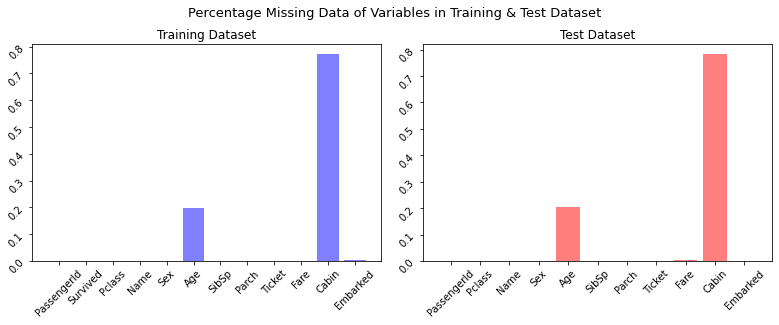

In [2]:
train_missing = train_df.isnull().sum()/train_df.shape[0]
test_missing = test_df.isnull().sum()/test_df.shape[0]


fig, (ax1, ax2) = plt.subplots(1, 2 , figsize = (11, 4))
fig.suptitle('Percentage Missing Data of Variables in Training & Test Dataset' , fontsize = 13)
fig.tight_layout(h_pad = 15)

ax1.bar(train_missing.index, train_missing, color = 'blue', alpha = .5); 
ax1.set_title('Training Dataset' );
ax1.tick_params( rotation = 45 );

ax2.bar(test_missing.index, test_missing , color = 'red' , alpha = .5); 
ax2.set_title('Test Dataset' );
ax2.tick_params( rotation = 45 );
 
plt.subplots_adjust(top=0.85)    
plt.show()    

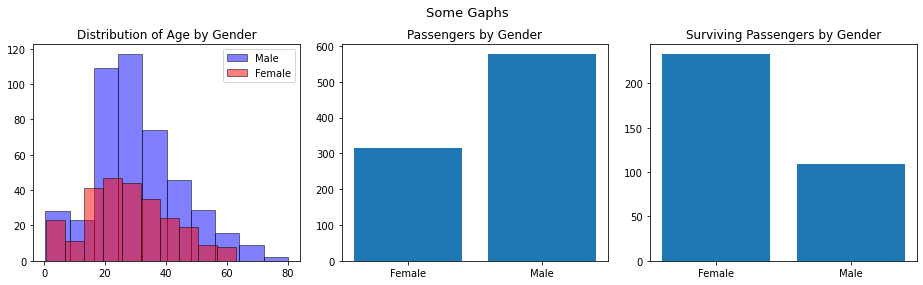

In [3]:
train_gender = pd.DataFrame(train_df.groupby("Sex", as_index = False).size())
train_survived_by_gender = pd.DataFrame(train_df.groupby("Sex")["Survived"].sum()).reset_index() 


fig, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize = (13, 4))

fig.suptitle('Some Gaphs' , fontsize = 13)
fig.tight_layout(h_pad = 15)
 
    
ax1.hist(train_df[train_df['Sex'] == 'Male']['Age'], color = 'blue', alpha = .5 , label = 'Male', edgecolor = 'black'); 
ax1.hist(train_df[train_df['Sex'] == 'Female']['Age'], color = 'red', alpha = .5, label = 'Female', edgecolor = 'black');  
ax1.set_title('Distribution of Age by Gender' );
ax1.legend()

ax2.bar(train_gender["Sex"], height = train_gender["size"]  )
ax2.set_title('Passengers by Gender' );  

#sns.barplot( ax = ax3 , x = "Sex" , y = "Survived", data = train_df)
ax3.bar(train_survived_by_gender["Sex"], height = train_survived_by_gender["Survived"]  )
ax3.set_title('Surviving Passengers by Gender' );

plt.subplots_adjust(top=0.85)    
plt.show()    